<a href="https://colab.research.google.com/github/Tantalise/ItalyMacroGroupProject/blob/main/MacroDataJazz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Merging the datasets

In [ ]:
# Load the datasets from Excel files
# transpose fucntion flips columns and rows
df1 = pd.read_excel('/content/Italy_Macro_Data.xlsx').transpose()
df2 = pd.read_excel('/content/US_Data.xlsx').transpose()

#fixed the issue
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

# Drop the 6th column(this was showing years for US data set. Didn't require dates two times)
merged_df.drop(columns=merged_df.columns[5], inplace=True)

# Rename the columns
new_columns = ["date", "italy_industrial_production", "italy_exchange_rates", "italy_reserves", "italy_CPI", "us_reserves", "us_CPI"]
merged_df.columns = new_columns

merged_df = merged_df.drop(merged_df.index[0])

# Drop every 12th row starting from the 3rd row (These were the averages/(more the values at the end) of each each year)
rows_to_drop = range(1, len(merged_df), 13)
merged_df = merged_df.drop(merged_df.index[rows_to_drop])

#Cleaning up the index for rows and columns
merged_df.reset_index(drop=True, inplace=True)

merged_df = merged_df.drop(merged_df.index[0])

#Aahan -
merged_df['date'] = pd.to_datetime(merged_df['date'])

display(merged_df.head(12).style)



,date,italy_industrial_production,italy_exchange_rates,italy_reserves,italy_CPI,us_reserves,us_CPI
1,1960-01-01 00:00:00,31.134278,0.001610,2989.500000,4.143942,21478.100000,13.436946
2,1960-02-01 00:00:00,32.602650,0.001610,2958.500000,4.136754,21395.700000,13.482806
3,1960-03-01 00:00:00,33.712883,0.001611,2923.500000,4.129566,21344.700000,13.482806
4,1960-04-01 00:00:00,33.891953,0.001600,2959.500000,4.125971,21278,13.528666
5,1960-05-01 00:00:00,34.632109,0.001600,2970.500000,4.133160,21234.300000,13.528666
6,1960-06-01 00:00:00,35.372264,0.001600,2997.500000,4.133160,21169.800000,13.574526
7,1960-07-01 00:00:00,33.891953,0.001600,3088.500000,4.151131,20999.400000,13.574526
8,1960-08-01 00:00:00,27.445439,0.001600,3201.500000,4.158318,20803.400000,13.574526
9,1960-09-01 00:00:00,35.002186,0.001600,3193.500000,4.154724,20430,13.574526
10,1960-10-01 00:00:00,34.632109,0.001600,3174.500000,4.154724,20068.200000,13.666246


<html>
  <h1>
   Constructing Variables for Italy and the US
  </h1>

</html>

In [ ]:
#i)This finds italy's nominal exchange rate
merged_df['italy_nominal_exchange_rate_growth'] = merged_df['italy_exchange_rates'].pct_change() * 100

#ii)
merged_df['italy_real_exchange_rate_index'] = merged_df['italy_exchange_rates'] * merged_df['us_CPI'] / merged_df['italy_CPI']
print(merged_df[['date', 'italy_real_exchange_rate_index']])

#iv)Calculating italy's and US' monthly inflation rate
merged_df['italy_inflation_rate'] = merged_df['italy_CPI'].pct_change() * 100
merged_df['us_inflation_rate'] = merged_df['us_CPI'].pct_change() * 100

#iii)
#The formula given in the lecture is:real exchange growth = monthly growth of nominal exchange rate + foreign inflation - domestic inflation
italy_real_exchange_rate_growth = merged_df['italy_nominal_exchange_rate_growth'] + merged_df['us_inflation_rate'] - merged_df['italy_inflation_rate']
merged_df['italy_real_exchange_rate_growth'] = italy_real_exchange_rate_growth


#v)Calculating italy's monthly growth in industrial production
merged_df['italy_industrial_production_growth'] = merged_df['italy_industrial_production'].pct_change() * 100

#v)Calculating Italy's growth in industrial production vs 12 months ago
merged_df['industrial_production_12_months_ago'] = merged_df['italy_industrial_production'].shift(12)
merged_df['italy_industrial_production_growth_vs_12_months_ago'] = ((merged_df['italy_industrial_production'] - merged_df['industrial_production_12_months_ago']) / merged_df['industrial_production_12_months_ago']) * 100
merged_df.drop(columns=['industrial_production_12_months_ago'], inplace=True)

#vii) Calculating US' and italy's index of value of international reservess
#Italy
base_year_reserves = merged_df.loc[merged_df['date'].dt.year == 1960, 'italy_reserves'].iloc[0]
merged_df['italy_reserves_index'] = (merged_df['italy_reserves'] / base_year_reserves) * 100

#US
base_year_us_reserves = merged_df.loc[merged_df['date'].dt.year == 1960, 'us_reserves'].iloc[0]
merged_df['us_reserves_index'] = (merged_df['us_reserves'] / base_year_us_reserves) * 100

display(merged_df.head(150))





          date italy_real_exchange_rate_index
1   1960-01-01                       0.005221
2   1960-02-01                       0.005247
3   1960-03-01                       0.005261
4   1960-04-01                       0.005246
5   1960-05-01                       0.005237
..         ...                            ...
368 1990-08-01                       0.000928
369 1990-09-01                        0.00092
370 1990-10-01                       0.000942
371 1990-11-01                        0.00096
372 1990-12-01                       0.000951

[372 rows x 2 columns]


,date,italy_industrial_production,italy_exchange_rates,italy_reserves,italy_CPI,us_reserves,us_CPI,italy_nominal_exchange_rate_growth,italy_real_exchange_rate_index,italy_inflation_rate,us_inflation_rate,italy_real_exchange_rate_growth,italy_industrial_production_growth,italy_industrial_production_growth_vs_12_months_ago,italy_reserves_index,us_reserves_index
1,1960-01-01,31.134278,0.00161,2989.5,4.143942,21478.1,13.436946,NaN,0.005221,NaN,NaN,NaN,NaN,NaN,100.0,100.0
2,1960-02-01,32.60265,0.00161,2958.5,4.136754,21395.7,13.482806,0.000000,0.005247,-0.173471,0.341297,0.514767,4.716258,NaN,98.963037,99.616353
3,1960-03-01,33.712883,0.001611,2923.5,4.129566,21344.7,13.482806,0.083470,0.005261,-0.173746,0.000000,0.257216,3.405346,NaN,97.792273,99.378902
4,1960-04-01,33.891953,0.0016,2959.5,4.125971,21278,13.528666,-0.704000,0.005246,-0.087050,0.340136,-0.276814,0.531161,NaN,98.996488,99.068353
5,1960-05-01,34.632109,0.0016,2970.5,4.13316,21234.3,13.528666,0.000000,0.005237,0.174226,0.000000,-0.174226,2.183868,NaN,99.364442,98.86489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1972-02-01,68.643442,0.001704,6749.451279,6.60227,12534.818851,18.940132,0.650933,0.004888,0.558147,0.486618,0.579404,2.077046,2.788702,225.771911,58.36093
147,1972-03-01,69.013519,0.001716,6659.310733,6.620592,12475.16172,18.985992,0.703561,0.004921,0.277516,0.242131,0.668175,0.539130,2.065678,222.756673,58.083172
148,1972-04-01,69.288093,0.001714,6574.371153,6.632808,12472.705665,19.031852,-0.116552,0.004918,0.184510,0.241546,-0.059516,0.397855,4.182373,219.915409,58.071737
149,1972-05-01,71.711505,0.001718,6554.760872,6.693883,13344.516533,19.077712,0.233649,0.004896,0.920801,0.240964,-0.446189,3.497588,5.18298,219.259437,62.130805


<html>
  <h1>
   Identifying Outliers and Setting them to Nan
  </h1>
    <h3>
    We are excluding outliers found in US reserves and US reserves index (particularly the ones found in the last year 1990)
  </h3>
</html>

In [52]:

# merged_df contains DataFrame with the economic parameters
# Select columns for economic parameters
economic_parameters = merged_df.iloc[:, 1:]

# Convert the values to numeric (if they are not already numeric)
economic_parameters = economic_parameters.apply(pd.to_numeric, errors='coerce')

# Extract row labels from the first column
row_labels = merged_df.iloc[:, 0].iloc[1:]  # Exclude the first row

# Define a function to identify outliers based on Z-score method
def find_outliers_z_score(column):
    z_scores = np.abs((column - column.mean()) / column.std())
    outliers = column[z_scores > 3]  # considering values greater than 3 standard deviations as outliers
    return outliers

# Identify outliers in each column of the DataFrame
outliers_dict = {}
for column in economic_parameters.columns:
    outliers = find_outliers_z_score(economic_parameters[column].iloc[1:])  # Exclude the first row
    if not outliers.empty:
        outliers_dict[column] = outliers

for column in economic_parameters.columns:
    if column in outliers_dict:
        print(f"Outliers for {column}:")
        for index in outliers_dict[column].index:
            if index < len(merged_df):
                row_label = merged_df.iloc[index, 0]
                outlier_value = outliers_dict[column][index]
                print(f" {row_label}:    {outlier_value:.2f}")
        print("\n")
    else:
        print(f"No outliers for {column}\n")


# Replace outliers with NaN in the DataFrame, except for the specified rows in 'us_reserves' and 'us_reserves_index'
for column, outliers in outliers_dict.items():
    if column not in ['us_reserves', 'us_reserves_index']:
        economic_parameters.loc[outliers.index, column] = np.nan  # Replace outliers with NaN
    else:
        # Exclude the specific rows starting from 1989-12-01
        economic_parameters.loc[outliers.index.intersection(economic_parameters.index < 359), column] = np.nan

# Merge the 'date' column with the DataFrame
economic_parameters.insert(0, 'date', merged_df['date'])

# Display the new DataFrame with outliers marked as NaN
display(economic_parameters.head(50).style)

No outliers for italy_industrial_production

No outliers for italy_exchange_rates

No outliers for italy_reserves

No outliers for italy_CPI

Outliers for us_reserves:
 1989-12-01 00:00:00:    72559.75
 1990-01-01 00:00:00:    74608.63
 1990-02-01 00:00:00:    75506.36
 1990-03-01 00:00:00:    74173.52
 1990-04-01 00:00:00:    76303.03
 1990-05-01 00:00:00:    76283.21
 1990-06-01 00:00:00:    77028.37
 1990-07-01 00:00:00:    77298.84
 1990-08-01 00:00:00:    77906.29
 1990-09-01 00:00:00:    78908.84
 1990-10-01 00:00:00:    80024.17
 1990-11-01 00:00:00:    82852.20
 1990-12-01 00:00:00:    83059.40


No outliers for us_CPI

Outliers for italy_nominal_exchange_rate_growth:
 1974-02-01 00:00:00:    -6.13
 1976-03-01 00:00:00:    -8.49
 1976-04-01 00:00:00:    -7.02
 1976-05-01 00:00:00:    -6.08
 1980-04-01 00:00:00:    -5.90
 1981-03-01 00:00:00:    -6.54
 1985-05-01 00:00:00:    5.67
 1985-11-01 00:00:00:    6.55


No outliers for italy_real_exchange_rate_index

Outliers for italy_

,date,italy_industrial_production,italy_exchange_rates,italy_reserves,italy_CPI,us_reserves,us_CPI,italy_nominal_exchange_rate_growth,italy_real_exchange_rate_index,italy_inflation_rate,us_inflation_rate,italy_real_exchange_rate_growth,italy_industrial_production_growth,italy_industrial_production_growth_vs_12_months_ago,italy_reserves_index,us_reserves_index
1,1960-01-01 00:00:00,31.134278,0.001610,2989.500000,4.143942,21478.100000,13.436946,nan,0.005221,nan,nan,nan,nan,nan,100.000000,100.000000
2,1960-02-01 00:00:00,32.602650,0.001610,2958.500000,4.136754,21395.700000,13.482806,0.000000,0.005247,-0.173471,0.341297,0.514767,4.716258,nan,98.963037,99.616353
3,1960-03-01 00:00:00,33.712883,0.001611,2923.500000,4.129566,21344.700000,13.482806,0.083470,0.005261,-0.173746,0.000000,0.257216,3.405346,nan,97.792273,99.378902
4,1960-04-01 00:00:00,33.891953,0.001600,2959.500000,4.125971,21278.000000,13.528666,-0.704000,0.005246,-0.087050,0.340136,-0.276814,0.531161,nan,98.996488,99.068353
5,1960-05-01 00:00:00,34.632109,0.001600,2970.500000,4.133160,21234.300000,13.528666,0.000000,0.005237,0.174226,0.000000,-0.174226,2.183868,nan,99.364442,98.864890
6,1960-06-01 00:00:00,35.372264,0.001600,2997.500000,4.133160,21169.800000,13.574526,0.000000,0.005255,0.000000,0.338983,0.338983,2.137194,nan,100.267603,98.564584
7,1960-07-01 00:00:00,33.891953,0.001600,3088.500000,4.151131,20999.400000,13.574526,0.000000,0.005232,0.434795,0.000000,-0.434795,-4.184948,nan,103.311591,97.771218
8,1960-08-01 00:00:00,27.445439,0.001600,3201.500000,4.158318,20803.400000,13.574526,0.000000,0.005223,0.173144,0.000000,-0.173144,-19.020782,nan,107.091487,96.858661
9,1960-09-01 00:00:00,35.002186,0.001600,3193.500000,4.154724,20430.000000,13.574526,0.000000,0.005228,-0.086422,0.000000,0.086422,27.533710,nan,106.823884,95.120146
10,1960-10-01 00:00:00,34.632109,0.001600,3174.500000,4.154724,20068.200000,13.666246,0.000000,0.005263,0.000000,0.675676,0.675676,-1.057299,nan,106.188326,93.435639


<html>

  <h1>
    Interpolation

  </h1>

</html>

In [53]:
economic_parameters.iloc[:, 2:] = economic_parameters.iloc[:, 2:].interpolate(axis = 0)

economic_parameters.loc[:13, 'italy_industrial_production_growth_vs_12_months_ago'] = np.nan
economic_parameters.loc[1,["italy_nominal_exchange_rate_growth","italy_inflation_rate","us_inflation_rate","italy_real_exchange_rate_growth","italy_industrial_production_growth"]] = np.nan

display(economic_parameters.head(50).style)

,date,italy_industrial_production,italy_exchange_rates,italy_reserves,italy_CPI,us_reserves,us_CPI,italy_nominal_exchange_rate_growth,italy_real_exchange_rate_index,italy_inflation_rate,us_inflation_rate,italy_real_exchange_rate_growth,italy_industrial_production_growth,italy_industrial_production_growth_vs_12_months_ago,italy_reserves_index,us_reserves_index
1,1960-01-01 00:00:00,31.134278,0.001610,2989.500000,4.143942,21478.100000,13.436946,nan,0.005221,nan,nan,nan,nan,nan,100.000000,100.000000
2,1960-02-01 00:00:00,32.602650,0.001610,2958.500000,4.136754,21395.700000,13.482806,0.000000,0.005247,-0.173471,0.341297,0.514767,4.716258,nan,98.963037,99.616353
3,1960-03-01 00:00:00,33.712883,0.001611,2923.500000,4.129566,21344.700000,13.482806,0.083470,0.005261,-0.173746,0.000000,0.257216,3.405346,nan,97.792273,99.378902
4,1960-04-01 00:00:00,33.891953,0.001600,2959.500000,4.125971,21278.000000,13.528666,-0.704000,0.005246,-0.087050,0.340136,-0.276814,0.531161,nan,98.996488,99.068353
5,1960-05-01 00:00:00,34.632109,0.001600,2970.500000,4.133160,21234.300000,13.528666,0.000000,0.005237,0.174226,0.000000,-0.174226,2.183868,nan,99.364442,98.864890
6,1960-06-01 00:00:00,35.372264,0.001600,2997.500000,4.133160,21169.800000,13.574526,0.000000,0.005255,0.000000,0.338983,0.338983,2.137194,nan,100.267603,98.564584
7,1960-07-01 00:00:00,33.891953,0.001600,3088.500000,4.151131,20999.400000,13.574526,0.000000,0.005232,0.434795,0.000000,-0.434795,-4.184948,nan,103.311591,97.771218
8,1960-08-01 00:00:00,27.445439,0.001600,3201.500000,4.158318,20803.400000,13.574526,0.000000,0.005223,0.173144,0.000000,-0.173144,-19.020782,nan,107.091487,96.858661
9,1960-09-01 00:00:00,35.002186,0.001600,3193.500000,4.154724,20430.000000,13.574526,0.000000,0.005228,-0.086422,0.000000,0.086422,27.533710,nan,106.823884,95.120146
10,1960-10-01 00:00:00,34.632109,0.001600,3174.500000,4.154724,20068.200000,13.666246,0.000000,0.005263,0.000000,0.675676,0.675676,-1.057299,nan,106.188326,93.435639


<html>
  <h1>
  5.3.1 Plots

  </h1>

</html>


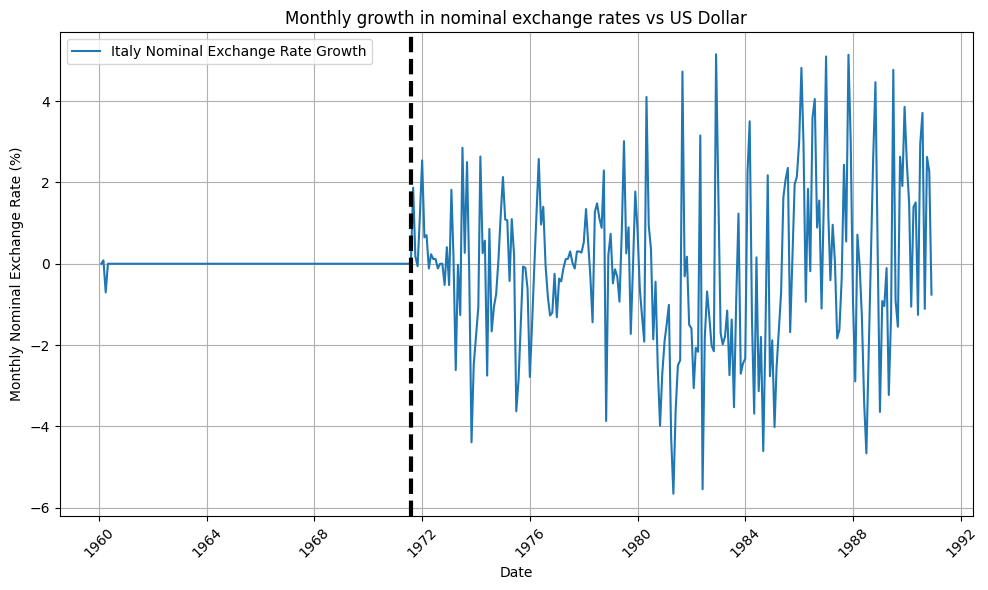

In [46]:
filtered_df = economic_parameters[(economic_parameters['date'] >= '1960-01-01') & (economic_parameters['date'] <= '1990-12-01')]
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['italy_nominal_exchange_rate_growth'], label='Italy Nominal Exchange Rate Growth')
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Monthly Nominal Exchange Rate (%)')
plt.title('Monthly growth in nominal exchange rates vs US Dollar')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


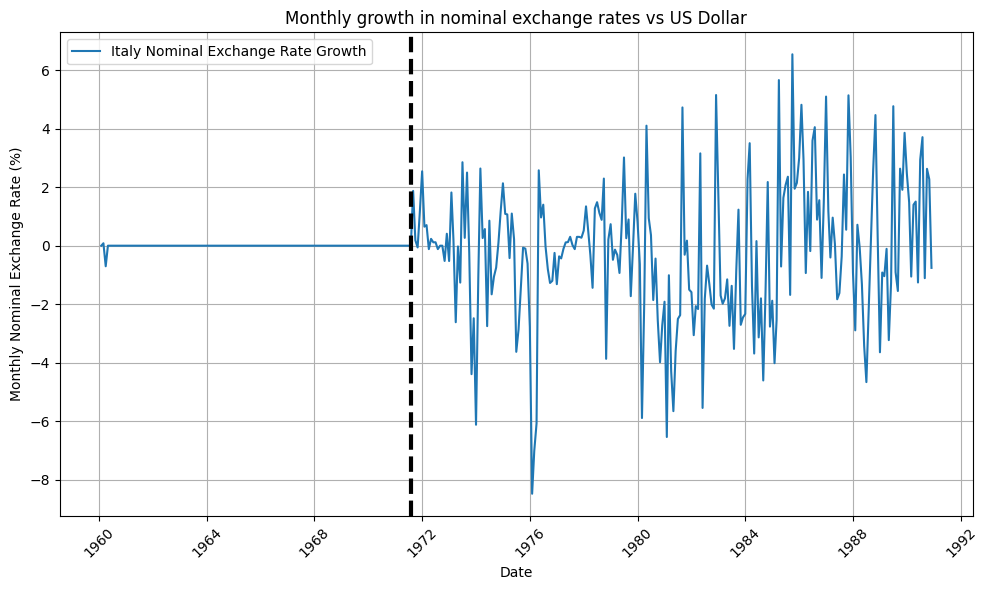

In [45]:
#non-interpolated
filtered_df = merged_df[(merged_df['date'] >= '1960-01-01') & (merged_df['date'] <= '1990-12-01')]
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['italy_nominal_exchange_rate_growth'], label='Italy Nominal Exchange Rate Growth')
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Monthly Nominal Exchange Rate (%)')
plt.title('Monthly growth in nominal exchange rates vs US Dollar')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


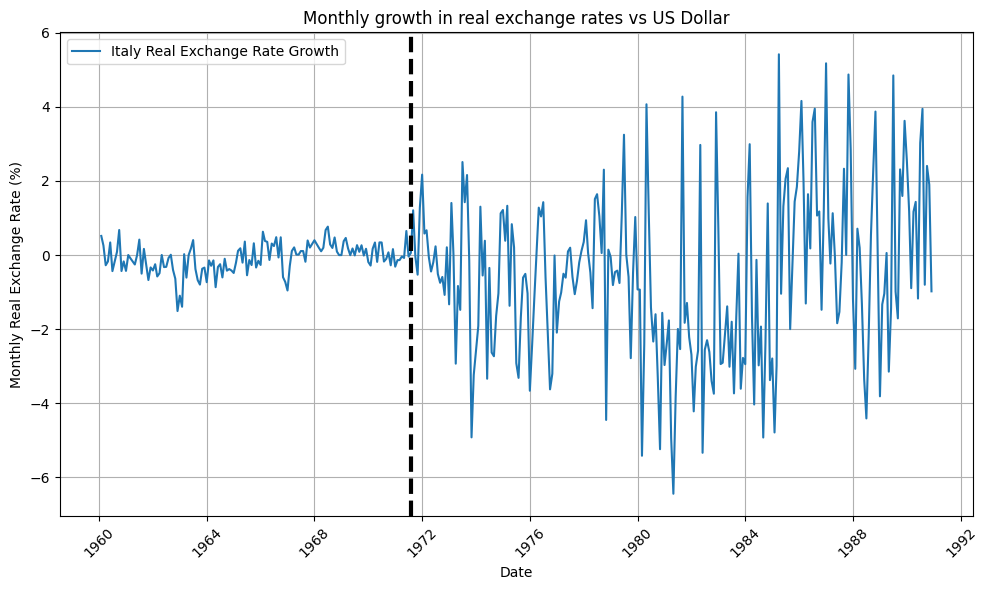

In [44]:
filtered_df = economic_parameters[(economic_parameters['date'] >= '1960-01-01') & (economic_parameters['date'] <= '1990-12-01')]
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['italy_real_exchange_rate_growth'], label='Italy Real Exchange Rate Growth')
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Monthly Real Exchange Rate (%)')
plt.title('Monthly growth in real exchange rates vs US Dollar')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

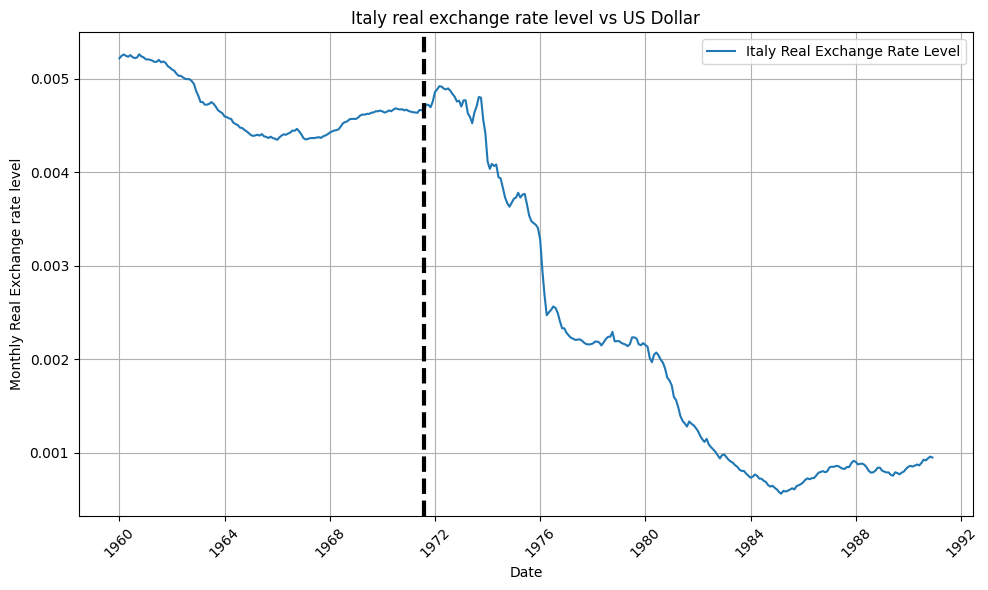

In [43]:
filtered_df = economic_parameters[(economic_parameters['date'] >= '1960-01-01') & (economic_parameters['date'] <= '1990-12-01')]
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['italy_real_exchange_rate_index'], label='Italy Real Exchange Rate Level')
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Monthly Real Exchange rate level')
plt.title('Italy real exchange rate level vs US Dollar')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

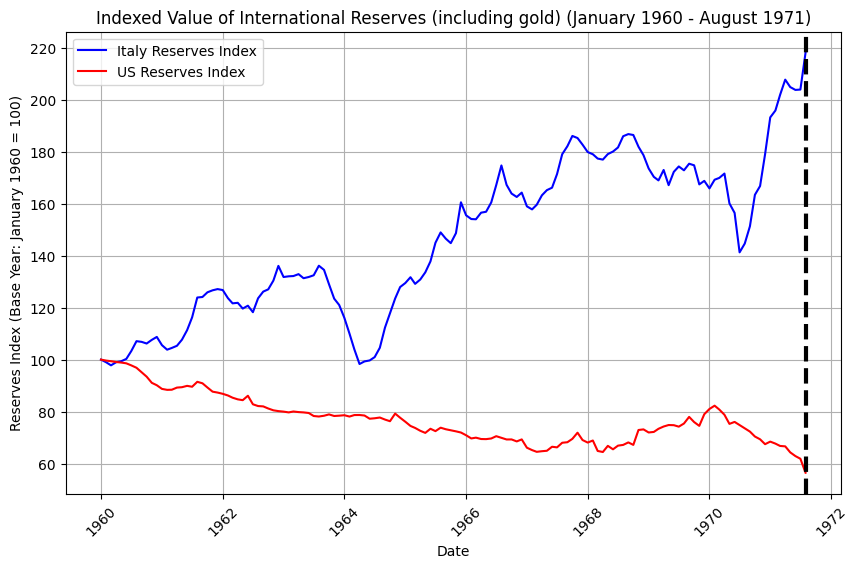

In [48]:
filtered_df = economic_parameters[(economic_parameters['date'] >= '1960-01-01') & (economic_parameters['date'] <= '1971-08-01')]
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['italy_reserves_index'], label='Italy Reserves Index', color='blue')
plt.plot(filtered_df['date'], filtered_df['us_reserves_index'], label='US Reserves Index', color='red')
plt.title('Indexed Value of International Reserves (including gold) (January 1960 - August 1971)')
plt.xlabel('Date')
plt.ylabel('Reserves Index (Base Year: January 1960 = 100)')
plt.legend()
plt.grid(True)
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xticks(rotation=45)
plt.show()

<html>
  <h1>
  5.3.2 Plots

  </h1>

</html>


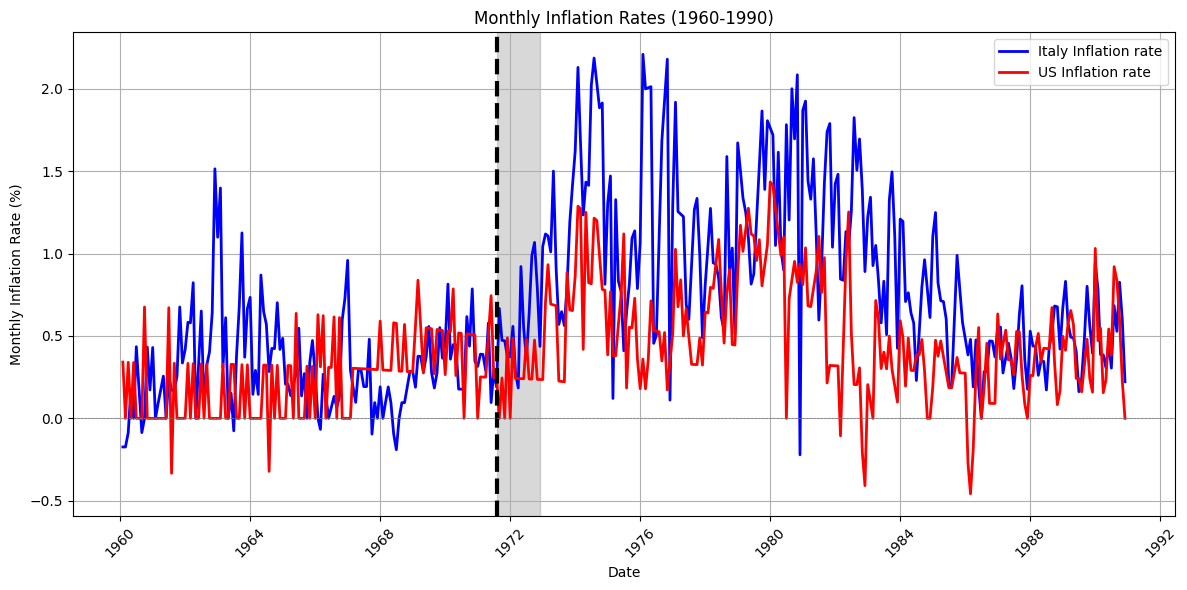

In [40]:
#using interpolated data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Filter the data
filtered_df = economic_parameters[(economic_parameters['date'] >= '1960-01-01') & (economic_parameters['date'] <= '1990-12-01')]

# Plotting
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.plot(filtered_df['date'], filtered_df['italy_inflation_rate'], label='Italy Inflation rate', color='blue', linewidth=2)
plt.plot(filtered_df['date'], filtered_df['us_inflation_rate'], label='US Inflation rate', color='red', linewidth=2)

# Highlighting the period between 1970 and 1971 in grey
plt.axvspan('1971-08-01', '1972-12-01', color='grey', alpha=0.3)  # Adjust alpha for transparency

# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Monthly Inflation Rate (%)')
plt.title('Monthly Inflation Rates (1960-1990)')
plt.legend()

# Grid and ticks
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Adding horizontal line at 0 for better reference
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

# Adding shaded regions to highlight specific periods, if necessary
# For example, you might want to highlight recession periods

# Adding annotations or arrows for important events, if necessary

# Saving the plot if needed
# plt.savefig('inflation_rates.png', dpi=300)

# Show the plot
plt.show()


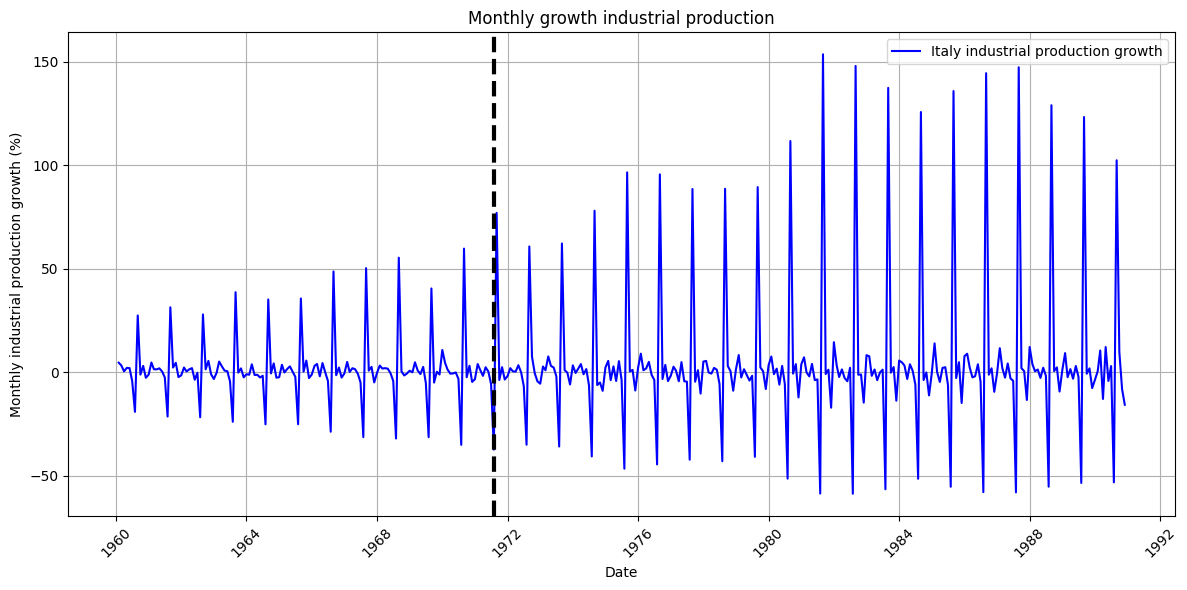

In [49]:
#plot using non-interpolated data with outliers
filtered1_df = merged_df[(merged_df['date'] >= '1960-01-01') & (merged_df['date'] <= '1990-12-01')]
plt.figure(figsize=(12, 6))
plt.plot(filtered1_df['date'], filtered1_df['italy_industrial_production_growth'], label='Italy industrial production growth', color='blue')
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Monthly industrial production growth (%)')
plt.title('Monthly growth industrial production')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

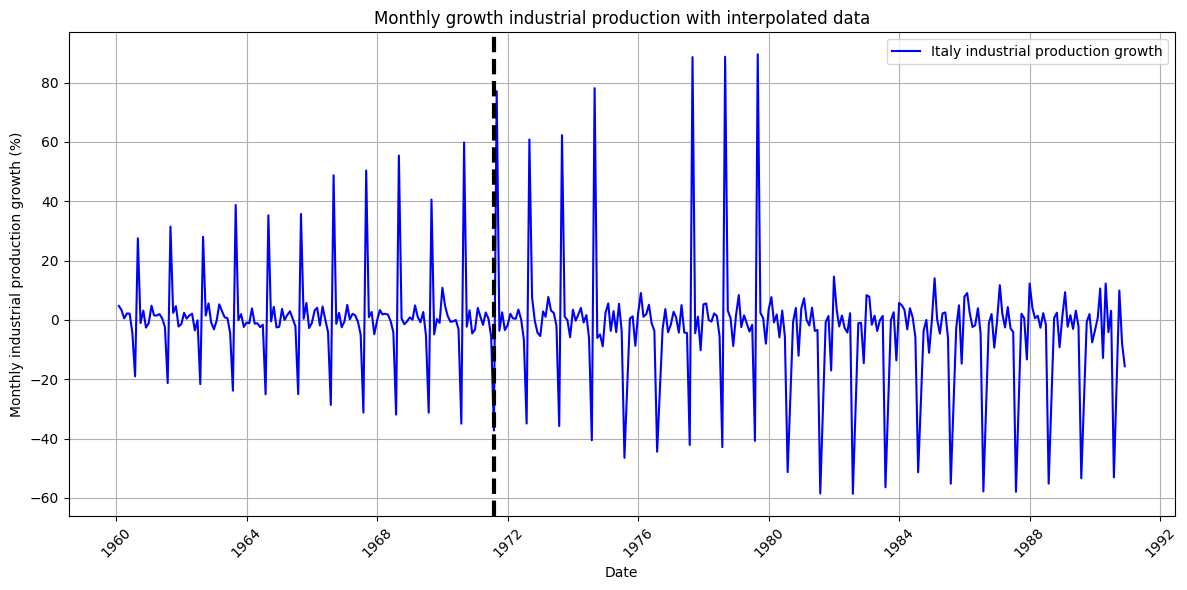

In [51]:
#Plot using interpolated data without outliers
filtered_df = economic_parameters[(economic_parameters['date'] >= '1960-01-01') & (economic_parameters['date'] <= '1990-12-01')]
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['date'], filtered_df['italy_industrial_production_growth'], label='Italy industrial production growth', color='blue')
plt.xlabel('Date')
plt.ylabel('Monthly industrial production growth (%)')
plt.title('Monthly growth industrial production with interpolated data')
plt.legend()
plt.grid(True)
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


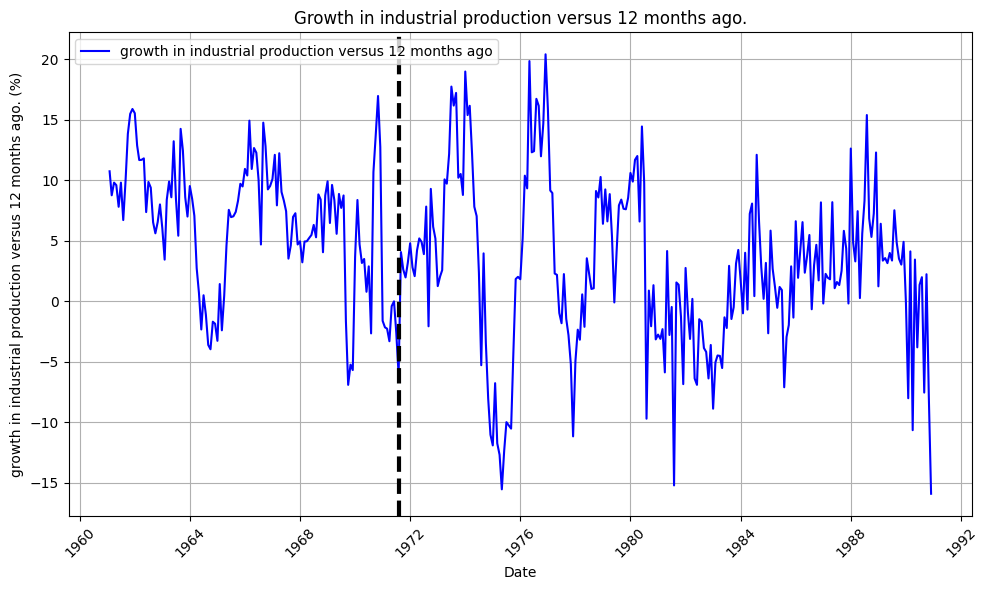

In [50]:
filtered_df = economic_parameters[(economic_parameters['date'] >= '1960-01-01') & (economic_parameters['date'] <= '1990-12-01')]
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['italy_industrial_production_growth_vs_12_months_ago'], label='growth in industrial production versus 12 months ago', color='blue')
# Adding vertical line at 1971-08-01
plt.axvline(x='1971-08-01', color='black', linestyle='--', linewidth=3)
plt.xlabel('Date')
plt.ylabel('growth in industrial production versus 12 months ago. (%)')
plt.title('Growth in industrial production versus 12 months ago.')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<html>
  <h1>
    5.3.3 Comparison Statistics
  </h1>

</html>

In addition to the analysis on STD, we also calculated the average levels of different variables before and after the Bretton Woods system in order to answer the questions in 5.4

In [32]:
# Assuming economic_parameters is the DataFrame containing the economic parameters

# Convert the 'date' column to datetime format
economic_parameters['date'] = pd.to_datetime(economic_parameters['date'])

# Calculate the difference between the inflation rates of Italy and the United States
economic_parameters['inflation_difference_with_US'] = economic_parameters['italy_inflation_rate'] - economic_parameters['us_inflation_rate']

# Define the start and end dates for the periods before and after Bretton Woods
bw_end_date = pd.to_datetime('1971-07-01')
after_bw_start_date = pd.to_datetime('1973-01-01')

# Filter the DataFrame to get data before and after Bretton Woods
before_bw_data = economic_parameters[economic_parameters['date'] <= bw_end_date]
after_bw_data = economic_parameters[economic_parameters['date'] >= after_bw_start_date]

# Define the columns for which you want to calculate the standard deviation
columns_to_calculate = ['italy_nominal_exchange_rate_growth',
                        'italy_real_exchange_rate_growth',
                        'italy_inflation_rate',
                        'inflation_difference_with_US',
                        'italy_industrial_production_growth', ]

# Calculate standard deviation for each variable before and after Bretton Woods
std_dev_before_bw = before_bw_data[columns_to_calculate].std()
std_dev_after_bw = after_bw_data[columns_to_calculate].std()

# Calculate the ratio of standard deviation before and after Bretton Woods
std_dev_ratio = std_dev_after_bw / std_dev_before_bw

# Create a DataFrame to store the results
std_dev_table = pd.DataFrame({'Before Bretton Woods STD': std_dev_before_bw,
                              'After Bretton Woods STD': std_dev_after_bw,
                              'STD Ratio': std_dev_ratio,
                            })
display(std_dev_table.style)



,Before Bretton Woods STD,After Bretton Woods STD,STD Ratio
italy_nominal_exchange_rate_growth,0.060400,2.161779,35.791224
italy_real_exchange_rate_growth,0.399256,2.321273,5.813994
italy_inflation_rate,0.290847,0.537226,1.847108
inflation_difference_with_US,0.400794,0.503948,1.257373
italy_industrial_production_growth,14.438666,20.612283,1.427575


In [33]:
# Define the columns for which you want to calculate the average
columns_to_calculate = ['italy_real_exchange_rate_index',
                        'italy_inflation_rate',
                        'italy_industrial_production'] #taking industrial production as proxy measure for economic activity

# Calculate average for each variable before and after Bretton Woods
average_before_bw = before_bw_data[columns_to_calculate].mean()
average_after_bw = after_bw_data[columns_to_calculate].mean()

# Calculate the ratio of average before and after Bretton Woods
average_ratio = average_after_bw / average_before_bw

avg_dev_table = pd.DataFrame({
    'Average before Bretton Woods ': average_before_bw,
    'Average after Bretton Woods ': average_after_bw,
    'Averate Ratio': average_ratio
})
display(avg_dev_table.style)

,Average before Bretton Woods,Average after Bretton Woods,Averate Ratio
italy_real_exchange_rate_index,0.004692,0.001787,0.380938
italy_inflation_rate,0.315960,0.952033,3.013144
italy_industrial_production,50.294236,88.207637,1.753832
